In [1]:
#19CS10031 | Gandhi Abhishek Rajesh
#CS1
#Cricket Format Clustering using Single Linkage Hierarchical Clustering Technique
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import math
random.seed(8) #random seed

In [2]:
data = pd.read_csv("cricket_1_unlabelled.csv")

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unnamed: 0         400 non-null    int64
 1   total_balls_faced  400 non-null    int64
 2   dot_balls_faced    400 non-null    int64
 3   number_of_fours    400 non-null    int64
 4   number_of_sixes    400 non-null    int64
 5   runs_scored        400 non-null    int64
dtypes: int64(6)
memory usage: 18.9 KB
None


In [4]:
print(data.head())

   Unnamed: 0  total_balls_faced  dot_balls_faced  number_of_fours  \
0           0                116                9               15   
1           1                154              104               21   
2           2                 72               32                6   
3           3                 75               19               12   
4           4                157               49               21   

   number_of_sixes  runs_scored  
0               12          224  
1               18          213  
2                6           85  
3                4          144  
4               18          313  


In [5]:
train = np.array(data)

In [6]:
train = train[:,1:]
train.shape
train = (train-np.sum(train,axis=0)/train.shape[0])/np.std(train,axis=0)

In [7]:
print(np.mean(train,axis=0))
print(np.std(train,axis=0))


[9.54791801e-17 1.15463195e-16 9.71445147e-17 1.28785871e-16
 1.04360964e-16]
[1. 1. 1. 1. 1.]


In [8]:
class bucket:
    def __init__(self,mean):
        self.mean = mean
        self.members = []
        self.member_index = []
        
    def update_mean(self,mean):
        if (self.mean == mean).all()==True:
            return True
        self.mean = mean
        return False

    def add_member(self,member,i):
        self.members.append(member)
        self.member_index.append(i)

    def return_array_mean(self):
        if(len(self.members)==0):
            print("zero members")
            return self.mean
        return sum(self.members)/len(self.members)

    def get_distance(self,input):
        return np.linalg.norm(input-self.mean)

    def reset_list(self):
        self.members = []
        self.member_index = []

In [9]:

class k_means:
    def __init__(self,k):
        self.k=k
        self.bucket = []
        self.max_iter = 20

    def distance(self,input1,input2):
        return np.linalg.norm(input1-input2)

    def init_bucket(self,data):
        n,d = data.shape
        for i in range(self.k):
            self.bucket.append(bucket(data[random.randrange(0,n)]))

    def closest_bucket(self,input):
        index = 0
        min = self.bucket[0].get_distance(input)
        for i in range(1,self.k):
            if min > self.bucket[i].get_distance(input):
                index = i
                min = self.bucket[i].get_distance(input)
        return index

    def fit(self,data):
        n,d = data.shape
        self.init_bucket(data)
        unchanged = False
        count=0
        while(not unchanged and count < self.max_iter ):
            count+=1
            unchanged = True
            for i in range(self.k):
                self.bucket[i].reset_list()
            for i in range(n):
                index = self.closest_bucket(data[i])
                self.bucket[index].add_member(data[i],i)
            for i in range(self.k):
                new_mean = self.bucket[i].return_array_mean()
                if not self.bucket[i].update_mean(new_mean):
                    unchanged = False

    def compute_silhouette(self):
        list_bucket = []
        value_bucket = 0
        for i in range(self.k):
            si=[]
            for j in self.bucket[i].members:
                ai=0
                for k in self.bucket[i].members:
                    ai+=self.distance(j,k)
                ai=(ai)/(len(self.bucket[i].members)-1)
                b_values = []
                for k in range(self.k):
                    if k!=i:
                        temp=0
                        for m in self.bucket[k].members:
                            temp+=self.distance(j,m)
                        b_values.append(temp/(len(self.bucket[k].members)))
                bi=min(b_values)
                si.append((bi-ai)/max(ai,bi))
            list_bucket.append(sum(si)/len(si))
        return max(list_bucket)

In [10]:
best_k = 3
best_k_mean = None
best_value = -1
values = []
k_th = []
for k in range(3,10):
    k_th.append(k)
    k_mean = k_means(k)
    k_mean.fit(train.astype(np.float64))
    temp = k_mean.compute_silhouette()
    values.append(temp)
    if(best_value<temp):
        best_value = temp
        best_k = k
        best_k_mean = k_mean
    print("Silhouette Distance calculated for value of k =",k,"is",temp)
print("Best value of k is",best_k)

Silhouette Distance calculated for value of k = 3 is 0.612232698509016
Silhouette Distance calculated for value of k = 4 is 0.6075144650799621
Silhouette Distance calculated for value of k = 5 is 0.5911234202027609
Silhouette Distance calculated for value of k = 6 is 0.3651634473822245
Silhouette Distance calculated for value of k = 7 is 0.4403507937448044
Silhouette Distance calculated for value of k = 8 is 0.43550103200081997
Silhouette Distance calculated for value of k = 9 is 0.4501636114359234
Best value of k is 3


Text(0, 0.5, 'Silhouuette coefficient')

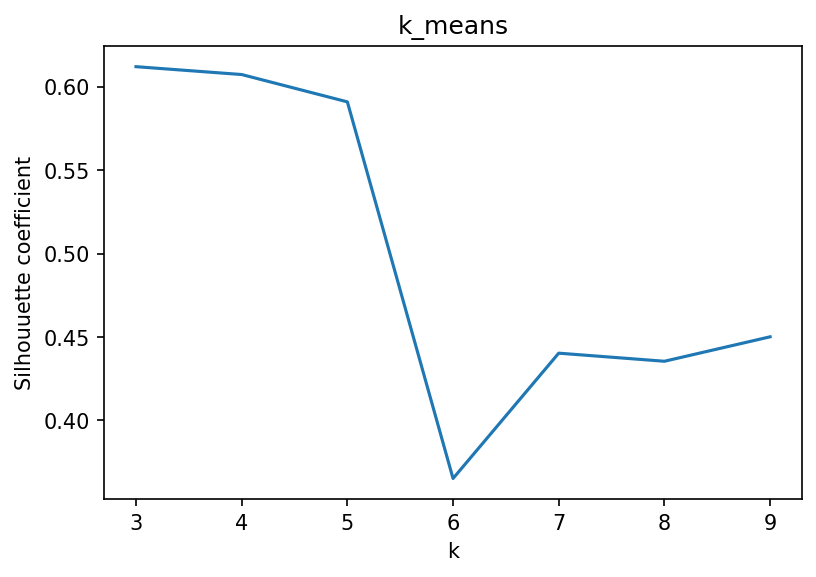

In [11]:
import matplotlib.pyplot as plt
plt.figure(dpi=150)
plt.plot(k_th,values)
plt.title('k_means')
plt.xlabel('k')
plt.ylabel('Silhouuette coefficient')

In [12]:
class storage:
    def __init__(self):
        self.members = []
        self.member_index = []

    def add_members(self,member,i):
        self.members.append(member)
        self.member_index.append(i)
        
    def merge(self,store):
        s = storage()
        s.members = self.members+store.members
        s.member_index = self.member_index + store.member_index
        return s

    def distance(self,input1,input2):
        return np.linalg.norm(input1-input2)

    def find_min_distance(self,storage):
        min = float('inf')
        for i in self.members:
            for j in storage.members:
                temp = self.distance(i,j)
                if(temp<min):
                    min=temp
        return min
    
  

In [13]:
class Hierarchical_Clustering:
    def __init__(self,k):
        self.storage_set = []
        self.k = k
        self.distance_matrix = []
        self.valid_locations = []
        self.final_sets = []

    def distance(self,input1,input2):
        return np.linalg.norm(input1-input2)

    def initialize_storage(self,data):
        n,d = data.shape
        for i in range(n):
            self.storage_set.append(storage())
            self.storage_set[i].add_members(data[i],i)
            temp = []
            for j in range(n):
                temp.append(float('inf'))
            self.distance_matrix.append(temp)
            self.valid_locations.append(1)
        
        for i in range(len(self.storage_set)):
                for j in range(i):
                    if(j!=i):
                        temp = self.storage_set[i].find_min_distance(self.storage_set[j])
                        self.distance_matrix[i][j] = temp
        self.distance_matrix = np.array(self.distance_matrix)

    def fit(self,data):
        self.initialize_storage(data)
        n,d = data.shape
        count = n
        while(np.sum(self.valid_locations)>self.k):
            result = np.unravel_index(np.argmin(self.distance_matrix, axis=None), self.distance_matrix.shape)
            merged_set = self.storage_set[result[0]].merge(self.storage_set[result[1]])
            self.valid_locations[result[1]]=0
            self.storage_set[result[0]] = merged_set
            for i in range(n):
                temp = np.array([self.distance_matrix[result[0],i],self.distance_matrix[result[1],i],                               self.distance_matrix[i,result[0]],self.distance_matrix[i,result[1]]])
                if(i<result[0] and i!=result[1]):
                    self.distance_matrix[result[0],i] = np.min(temp)
                if(i>result[0] and i!=result[1]):
                    self.distance_matrix[i,result[0]] = np.min(temp)
                self.distance_matrix[i,result[1]] = float('inf')
                self.distance_matrix[result[1],i] = float('inf')
            count-=1
        for i in range(n):
            if(self.valid_locations[i]==1):
                self.final_sets.append(self.storage_set[i])


    def fit_hard(self,data):
        self.initialize_storage(data)
        n,d = data.shape
        count = n
        while(count>self.k):
            min = float('inf')
            set1 = None
            set2 = None
            for i in self.storage_set:
                for j in self.storage_set:
                    if(j!=i):
                        temp = i.find_min_distance(j)
                        if(temp<min):
                            set2= i
                            set1= j
                            min = temp
            self.storage_set.remove(set1)
            self.storage_set.remove(set2)
            self.storage_set.append(set1.merge(set2))
            count-=1
        self.final_sets = self.storage_set

    def compute_silhouette(self):
        list_bucket = []
        value_bucket = 0
        for i in range(self.k):
            si=[]
            for j in self.final_sets[i].members:
                ai=0
                for k in self.final_sets[i].members:
                    ai+=self.distance(j,k)
                #print(len(self.final_sets[i].members))
                if(len(self.final_sets[i].members)!=1):
                    ai=(ai)/(len(self.final_sets[i].members)-1)
                else:
                    ai = 100000
                b_values = []
                for k in range(self.k):
                    if k!=i:
                        temp=0
                        for m in self.final_sets[k].members:
                            temp+=self.distance(j,m)
                        b_values.append(temp/(len(self.final_sets[k].members)))
                bi=min(b_values)
                si.append((bi-ai)/max(ai,bi))
            list_bucket.append(sum(si)/len(si))
        return max(list_bucket)


In [14]:
h = Hierarchical_Clustering(best_k)
h.fit(train.astype(np.float64)) 
print("silhouette cofficient for agglomerative single linkage is",h.compute_silhouette())
values = []
k_th = []
for k in range(3,10):
    k_th.append(k)
    h1 = Hierarchical_Clustering(k)
    h1.fit(train.astype(np.float64))
    temp = h1.compute_silhouette()
    values.append(temp)

silhouette cofficient for agglomerative single linkage is 0.6122326985090161


Text(0, 0.5, 'Silhouuette coefficient')

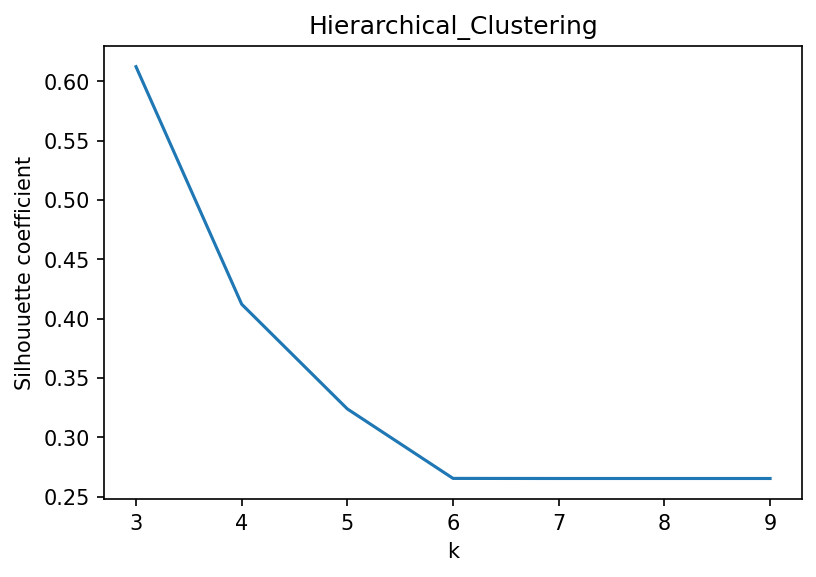

In [15]:
plt.figure(dpi=150)
plt.plot(k_th,values)
plt.title('Hierarchical_Clustering')
plt.xlabel('k')
plt.ylabel('Silhouuette coefficient')

In [16]:
#h1 = Hierarchical_Clustering(3)
#h1.fit_hard(train.astype(np.float64)) 
#h1.compute_silhouette()

In [17]:
class Jagard_similarity:
    def __init__(self,k_means,Hierarchical_Clustering):
        self.kmeans = k_means
        self.Hier_cluster = Hierarchical_Clustering
    def intersection(self,lst1, lst2): 
        lst3 = [value for value in lst1 if value in lst2] 
        return lst3
    def Union(self,lst1, lst2): 
        final_list = list(set(lst1) | set(lst2)) 
        return final_list 
    def jagard_simple(self,list1,list2):
        return len(self.intersection(list1,list2))/len(self.Union(list1,list2))
    def compute(self):
        final_values = []
        for i in self.kmeans.bucket:
            temp = []
            for j in self.Hier_cluster.final_sets:
                temp.append(self.jagard_simple(i.member_index,j.member_index))
            final_values.append(max(temp))
        return final_values


        

In [18]:
for i in range(best_k):
    print(len(h.final_sets[i].members))

134
133
133


In [19]:
class save_to_file:
    def save_k_means(self,k_mean):
        f = open("kmeans.txt","w")
        index_list = []
        list_order = []
        for i in k_mean.bucket:
            i.member_index.sort()
            index_list.append(i.member_index)
            list_order.append(i.member_index[0])
        for i in range(k_mean.k):
            minpos = list_order.index(min(list_order))
            list_order[minpos] = float('inf')
            s = ""
            for i in index_list[minpos]:
                s+=str(i)+","
            s = s[:-1]
            f.write(s)
            f.write('\n')

    def save_hier(self,hier):
        f = open("agglomerative.txt","w")
        index_list = []
        list_order = []
        for i in hier.final_sets:
            i.member_index.sort()
            index_list.append(i.member_index)
            list_order.append(i.member_index[0])
        for i in range(hier.k):
            minpos = list_order.index(min(list_order))
            list_order[minpos] = float('inf')
            s = ""
            for i in index_list[minpos]:
                s+=str(i)+","
            s = s[:-1]
            f.write(s)
            f.write('\n')

In [20]:
nth = {
    0:"zeroth",
    1: "first",
    2: "second",
    3: "third",
    4: "fourth",
    5: "fifth",
    6: "sixth"
}
s = save_to_file()
s.save_k_means(best_k_mean)
s.save_hier(h)
j= Jagard_similarity(best_k_mean,h)
scores = j.compute()
for i in range(len(scores)):
    print("Jagard_similarity for",nth[i],"cluster is",scores[i])

Jagard_similarity for zeroth cluster is 1.0
Jagard_similarity for first cluster is 1.0
Jagard_similarity for second cluster is 1.0
